In [3]:
# Tutorial courtesy of https://towardsdatascience.com/image-classification-in-10-minutes-with-mnist-dataset-54c35b77a38d

import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

## Download data

In [4]:
(xtrain, ytrain), (xtest, ytest) = tf.keras.datasets.mnist.load_data()

8
(60000, 28, 28)


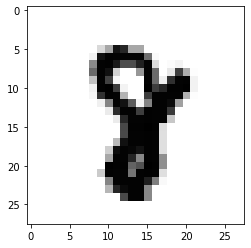

In [5]:
index = 8008
print(ytrain[index])
print(xtrain.shape)
plt.imshow(xtrain[index], cmap='Greys')
plt.show()

## Reshape and normalize images

In [6]:
#Reshape array to 4 dimensions
xtrain = xtrain.reshape(xtrain.shape[0], 28, 28, 1)
xtest = xtest.reshape(xtest.shape[0], 28, 28, 1)
inputShape = (28, 28, 1)

#Ensure values are floats
xtrain = xtrain.astype('float32')
xtest = xtest.astype('float32')

#Normalize by dividing by max RGB value
xtrain = xtrain/255
xtest = xtest/255

print('xtrain shape:', xtrain.shape)

xtrain shape: (60000, 28, 28, 1)


## Build network

In [8]:
#Create Sequential model and add layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=inputShape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10, activation=tf.nn.softmax))

## Compile and fit model

In [9]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(xtrain, ytrain, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 6s 107us/sample - loss: 0.2046 - acc: 0.9389
Epoch 2/10
60000/60000 [==============================] - 6s 105us/sample - loss: 0.0837 - acc: 0.9752
Epoch 3/10
60000/60000 [==============================] - 6s 105us/sample - loss: 0.0604 - acc: 0.9808
Epoch 4/10
60000/60000 [==============================] - 6s 106us/sample - loss: 0.0427 - acc: 0.9863
Epoch 5/10
60000/60000 [==============================] - 6s 106us/sample - loss: 0.0361 - acc: 0.9878
Epoch 6/10
60000/60000 [==============================] - 6s 106us/sample - loss: 0.0304 - acc: 0.9899
Epoch 7/10
60000/60000 [==============================] - 6s 106us/sample - loss: 0.0258 - acc: 0.9912
Epoch 8/10
60000/60000 [==============================] - 6s 106us/sample - loss: 0.0221 - acc: 0.9926
Epoch 9/10
60000/60000 [==============================] - 6s 106us/sample - loss: 0.0187 - acc: 0.9934
Epoch 10/10
60000/60000 [==============================] - 6s 106us/sampl

## Evaluate model

In [10]:
results = model.evaluate(xtest, ytest)
accuracy = results[1]*100
print('Accuracy: %0.2f%%' %accuracy)

10000/10000 [==============================] - 0s 33us/sample - loss: 0.0630 - acc: 0.9842
Accuracy: 98.42%


## Predict results

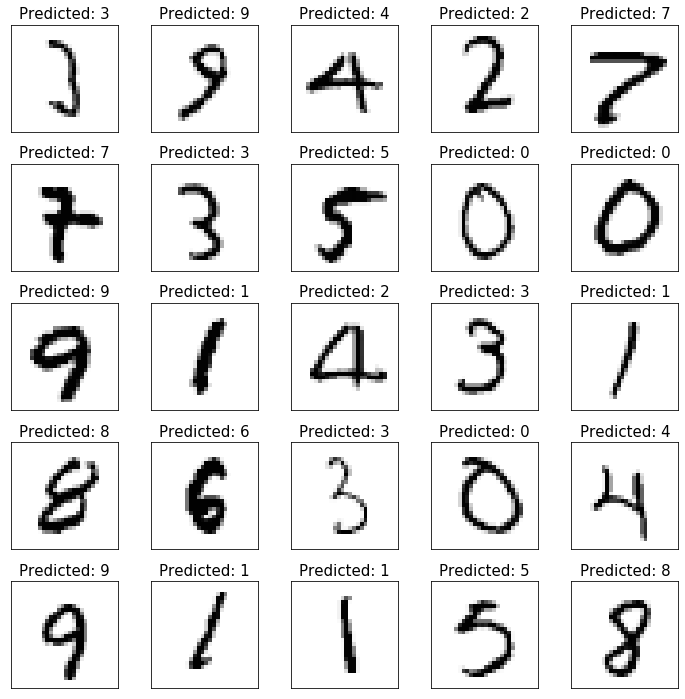

In [11]:
index = 4443
rows = 5
cols = 5
plt.figure(figsize=(2*cols, 2*rows))
for i in range(rows*cols):
    plt.subplot(rows, cols, i+1)
    plt.imshow(xtest[index].reshape(28,28), cmap='Greys')
    plt.tight_layout()
    plt.xticks([])
    plt.yticks([])
    pred = model.predict(xtest[index].reshape(1,28,28,1))
    plt.title('Predicted: %s' %pred.argmax(), fontsize=15)
    index += 11
plt.show()